In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.express as px
import seaborn as sns
from datetime import timedelta
from matplotlib.patches import Patch

In [79]:
# Lade die Ergebnisse des Genetic Matchings
df_all = pd.read_csv("../tests/gantt_daten.csv", parse_dates=["Start", "Ende"])
df_current = pd.read_csv("../tests/matching_ergebnis.csv")
print(df_current.head())

                         teilaufgabe_id                teilaufgabe  \
0  2e2055a3-33f3-4451-b94e-8effc05c681e      Entwurf CAD-Baugruppe   
1  2e2055a3-33f3-4451-b94e-8effc05c681e      Entwurf CAD-Baugruppe   
2  b217295a-9c66-4665-846c-ca6a6965ecb6    Simulation FEM-Struktur   
3  b217295a-9c66-4665-846c-ca6a6965ecb6    Simulation FEM-Struktur   
4  4debe244-8b4d-4e2b-a0e8-8d9958e4df1b  Signalverarbeitung Sensor   

                             projekt_id           kompetenz  \
0  cc1dfefd-b91a-4155-bb52-7f15f701af9f                 CAD   
1  cc1dfefd-b91a-4155-bb52-7f15f701af9f                 CAD   
2  cc1dfefd-b91a-4155-bb52-7f15f701af9f                 FEM   
3  cc1dfefd-b91a-4155-bb52-7f15f701af9f                 FEM   
4  cc1dfefd-b91a-4155-bb52-7f15f701af9f  Signalverarbeitung   

                              person_id                              name  \
0  3f9721df-d27b-4727-89e7-81a5dc1d7cb7                    Annamaria Seip   
1  70655a4b-2913-47a0-a3a1-5ba16362d492    Her

In [80]:
# Prepare a column to identify current project assignments
df_all["is_current_project"] = False

In [81]:
# Mark current project assignments in df_all
for _, row in df_current.iterrows():
    mask = (
        (df_all["Aufgabe"] == row["teilaufgabe"]) &
        (df_all["Person"] == row["name"])
    )
    df_all.loc[mask, "is_current_project"] = True

In [82]:
gantt_tage = []
for _, row in df_all.iterrows():
    tage = int(row["Stunden"] / 8)
    aktuelles_datum = row["Start"]
    for _ in range(tage):
        gantt_tage.append({
            "Datum": aktuelles_datum,
            "Aufgabe": row["Aufgabe"],
            "Person": row["Person"],
            "Aufgabe_Person": f"{row['Aufgabe']} ({row['Person']})",
            "is_current_project": row["is_current_project"]
        })
        aktuelles_datum += timedelta(days=1)
df_tagweise = pd.DataFrame(gantt_tage)

In [83]:
print(df_tagweise.head())
print(df_tagweise.columns)
print(len(df_tagweise))

       Datum                  Aufgabe                            Person  \
0 2025-05-01  Simulation FEM-Struktur  Dipl.-Ing. Bernd-Dieter Gröttner   
1 2025-05-02  Simulation FEM-Struktur  Dipl.-Ing. Bernd-Dieter Gröttner   
2 2025-05-03  Simulation FEM-Struktur  Dipl.-Ing. Bernd-Dieter Gröttner   
3 2025-05-04  Simulation FEM-Struktur  Dipl.-Ing. Bernd-Dieter Gröttner   
4 2025-05-05  Simulation FEM-Struktur  Dipl.-Ing. Bernd-Dieter Gröttner   

                                      Aufgabe_Person  is_current_project  
0  Simulation FEM-Struktur (Dipl.-Ing. Bernd-Diet...                True  
1  Simulation FEM-Struktur (Dipl.-Ing. Bernd-Diet...                True  
2  Simulation FEM-Struktur (Dipl.-Ing. Bernd-Diet...                True  
3  Simulation FEM-Struktur (Dipl.-Ing. Bernd-Diet...                True  
4  Simulation FEM-Struktur (Dipl.-Ing. Bernd-Diet...                True  
Index(['Datum', 'Aufgabe', 'Person', 'Aufgabe_Person', 'is_current_project'], dtype='object')
60


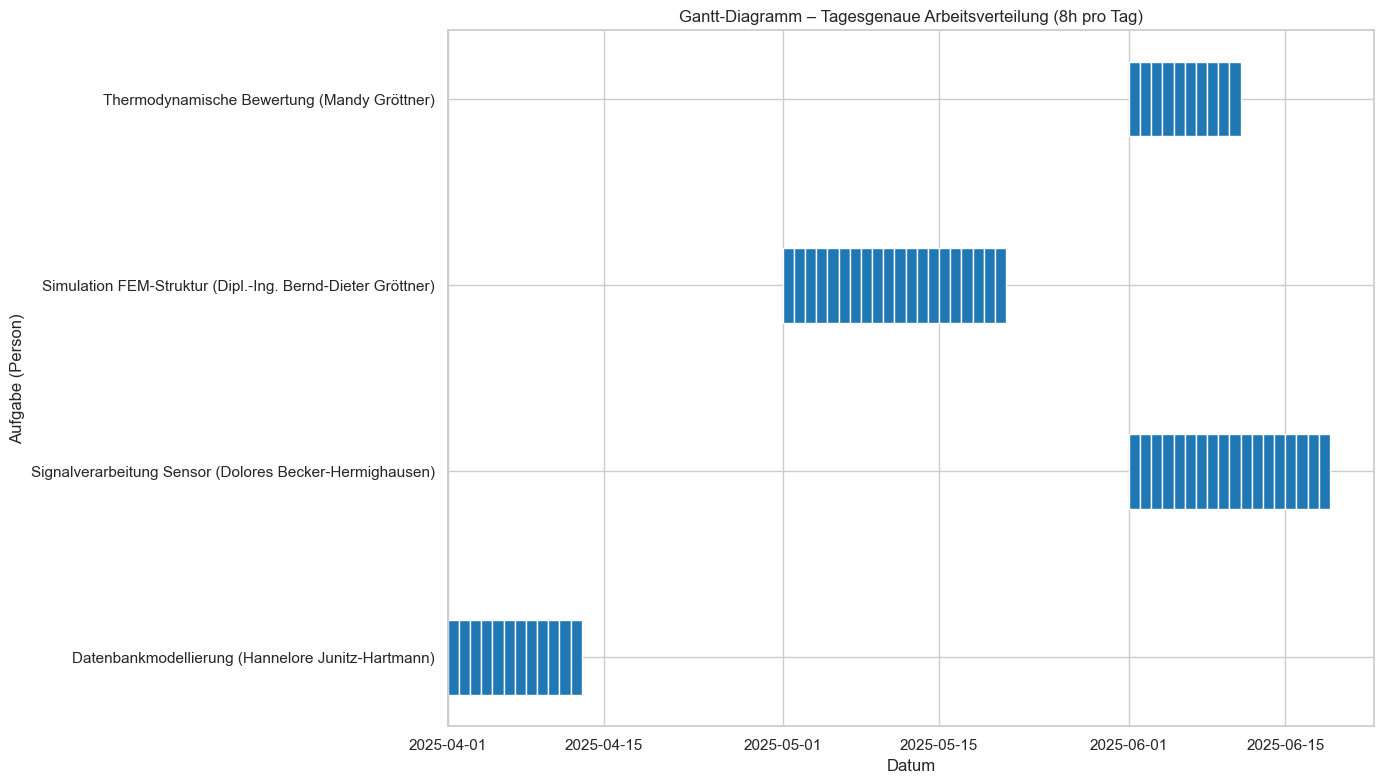

In [84]:
plt.figure(figsize=(14, 8))

sortierung = df_tagweise.groupby("Aufgabe_Person")["Datum"].min().sort_values().index

for i, (aufgabe_person, gruppe) in enumerate(df_tagweise.groupby("Aufgabe_Person")):
    for _, row in gruppe.iterrows():
        color = "tab:blue" if row["is_current_project"] else "lightgray"
        plt.barh(
            y=aufgabe_person,
            left=row["Datum"],
            width=1,
            height=0.4,
            color=color
        )

plt.xlabel("Datum")
plt.ylabel("Aufgabe (Person)")
plt.title("Gantt-Diagramm – Tagesgenaue Arbeitsverteilung (8h pro Tag)")
plt.tight_layout()
plt.show()

In [85]:
# Zelle 6: Interaktive Plotly-Visualisierung
pio.renderers.default = 'browser'
fig = px.timeline(
    df_tagweise,
    x_start='Datum',
    x_end=df_tagweise['Datum'] + pd.Timedelta(days=1),
    y='Aufgabe_Person',
    color='Person',
    hover_data=['Aufgabe', 'Person']
)
fig.update_yaxes(autorange='reversed')
fig.show()